In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\babub\Documents\github\DSC540-data-wrangling\sales_record.csv")

In [3]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


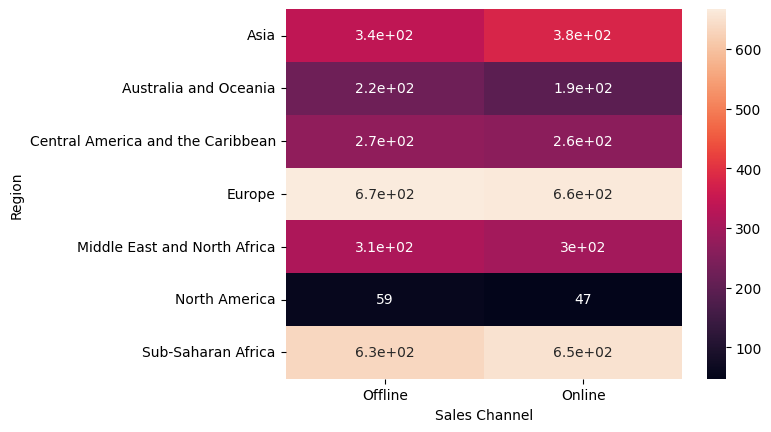

In [4]:
sns.heatmap(pd.crosstab(df["Region"],df["Sales Channel"]), annot=True)
plt.show()

In [12]:
pd.crosstab(df["Region"],df["Order Priority"])

Index(['C', 'H', 'L', 'M'], dtype='object', name='Order Priority')

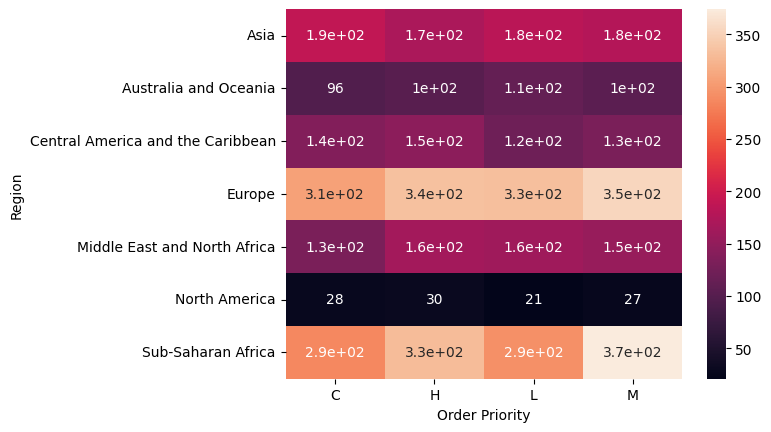

In [5]:
sns.heatmap(pd.crosstab(df["Region"],df["Order Priority"]), annot=True)
plt.show()

In [64]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns

data = load_iris()
target = data.target
features = data.data

df = pd.DataFrame(np.hstack((features, target.reshape(-1,1))),
                  columns=(data.feature_names + ["species"]))
df["species"] = df["species"].replace({0:"setosa", 1:"versicolor", 2:"virginica"})

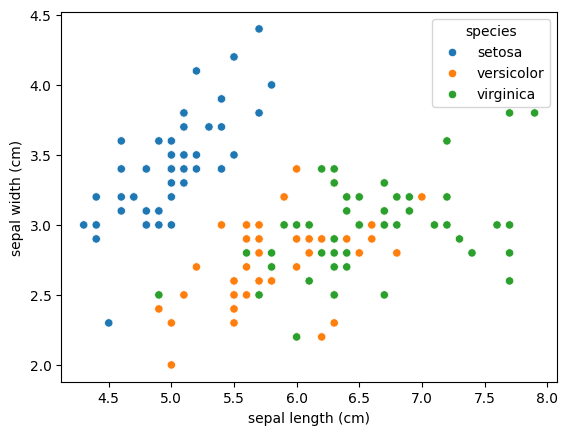

In [65]:
sns.scatterplot(data=df,x="sepal length (cm)",y="sepal width (cm)", hue="species")
plt.show()

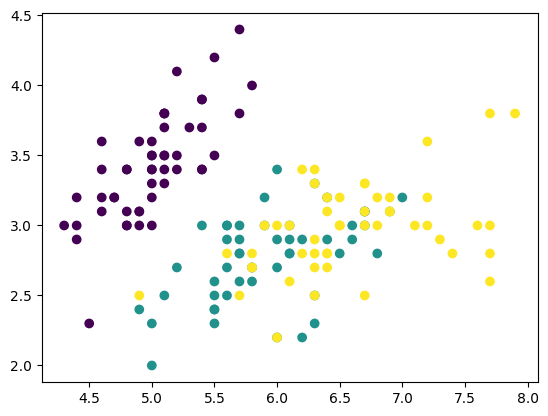

In [45]:
# df.plot.scatter(x="sepal length (cm)",y="sepal width (cm)", c="species")
plt.scatter(features[:,0],features[:,1], c=target)
plt.show()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'setosa:blue'

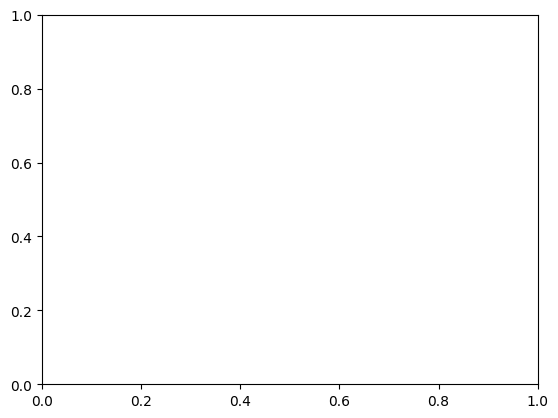

In [46]:

fig, ax = plt.subplots()
for color in ['setosa:blue', 'versicolor:orange', 'virginica:green']:
    ax.scatter(x=features[:,0],y=features[:,1], c=color, label=color)

ax.legend()
plt.show()

### Feature Extraction

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [4]:
digits = load_digits()

In [5]:
features = StandardScaler().fit_transform(digits.data)

In [8]:
# retain 99% variance with minimum features, whiten sets mean 0 and variance 1
pca = PCA(n_components=0.99,whiten=True)

In [10]:
features_pca = pca.fit_transform(features)

In [11]:
# number of features
features.shape

(1797, 64)

In [12]:
#pca features
features_pca.shape

(1797, 54)

#### PCA for linearly inseparable data

In [16]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

In [17]:
features, _ = make_circles(n_samples=1000, random_state=1, noise=0.1, factor=0.1)

In [18]:
kpca = KernelPCA(n_components=1, gamma=15, kernel="rbf")
#kernel can be poly,sigmoid,linear

In [19]:
featues_kpca = kpca.fit_transform(features)

In [21]:
featues_kpca.shape, features.shape

((1000, 1), (1000, 2))